In [51]:
import heartpy as hp
import matplotlib.pyplot as plt
import numpy as np
import scipy
import csv

In [52]:
# 피험자를 선택하여 데이터 불러오는 함수
def select_subject(_subject):
    path = 'C:\Users\user\Downloads\iDAQ-400\Software\iDAQ400\Data\ASCII_data\\' + subject
#     print(path)
    _listOfData= [path+'\\' +_subject + '_ref.txt',
                  path+'\\' +_subject + '_calm.txt',
                  path+'\\' +_subject + '_horror.txt',
                  path+'\\' +_subject + '_happy.txt',
                  path+'\\' +_subject + '_sad.txt']
    
    return _listOfData

In [62]:
# peak 찾는 함수(amplitude)
def detect_peak(hrdata):
    point=scipy.signal.find_peaks(hrdata,distance=200)
#     print(point[0])
    plt.scatter(point[0],hrdata[point[0]])
    plt.plot(hrdata)
    peak=np.zeros(len(point[0]))
    for i in range(len(point[0])):
        peak[i]=(hrdata[point[0][i]])
#     print(peak)
    return(peak,point[0])
# detect_peak(hrdata)

In [68]:
#주기찾는 함수 
def find_period(points):
    period=[]
    for i in range(len(points)-1):
        period.append(points[i+1]-points[i])
    print('period:',period)
    return(period)
# period=find_period(peak)

In [55]:
# 평균 ppi 구하는 함수
def calculate_PPI(periods):
    PPI=0.0;
    for i in range(len(periods)):
        PPI +=periods[i]
    PPI /= len(periods)
    return PPI

In [56]:
# 평균 amplitude 구하는 함수
def calculate_Amplitude(hrpeaks):
    amplitude=0.0;
    for i in range(len(hrpeaks)):
        amplitude +=hrpeaks[i]
    amplitude /= len(hrpeaks)
    return amplitude

In [57]:
# 레퍼런스 대비 변화율 계산하는 함수
def calculate_ChangeRate(ref,x):
    changeRate = ((x-ref)/ref)*100
    return changeRate

In [58]:
# 변화율 csv로 출력하는 함수
def write_csv(_subject, list_amp,list_ppi):
    f = open(_subject + '_output.csv', 'w')
    wr = csv.writer(f)
    for i in range(len(list_amp)):
        wr.writerow([str(i+1) +" emotion", str(list_amp[i]), str(list_ppi[i])])
    f.close()

5
('period:', [442, 390, 398, 432, 445, 478, 415, 440, 455, 433, 363, 408, 418, 223, 204, 390, 378, 418, 458, 440, 411, 392, 423, 415, 413, 386, 357, 388, 403, 414, 418, 377, 413, 412, 407, 382, 402, 395, 399, 410, 385, 396, 402, 402, 398, 411, 430, 405, 407, 408, 408, 383, 388, 397, 388, 388, 426, 368, 404, 407, 386, 390, 367, 374, 377, 380, 396, 381, 387, 388, 386, 376, 341, 338, 402, 379, 399, 396, 336, 352, 378, 232, 206, 400, 352, 384, 342, 357, 359, 367, 363, 346, 369, 417, 358, 403, 410, 403, 377, 376, 367, 374, 364, 366, 377, 361, 354, 359, 364, 365, 379, 375, 365, 371, 383, 382, 374, 379, 361, 351, 355, 363, 385, 368, 367, 356, 367, 377, 369, 335, 359, 351, 337, 331, 334, 332, 337, 340, 335, 330, 318, 310, 314, 316, 313, 311, 316, 337, 325, 326, 326, 302, 331, 311, 309, 329, 337, 347, 338, 346, 361, 357, 338, 354, 351, 328, 340, 341, 348, 346, 357, 351, 348, 364, 370, 378, 378, 338, 350, 367, 355, 358, 379, 339, 374, 376, 370, 342, 355, 372, 365, 379, 367, 388, 393, 376, 389, 

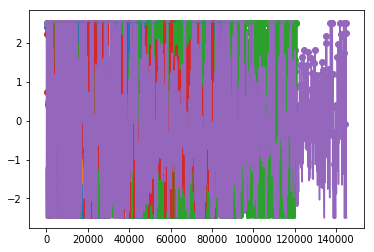

In [70]:
# 데이터 불러오기
# subject에 분석할 피험자 이름 설정하기!
subject='knh'
listOfData = select_subject(subject)

# 레퍼런스 및 영상별 평균 amplitude, ppi 계산
# 0=ref, 1=평온, 2=공포, 3=기쁨, 4=슬픔
hrList=[0 for i in range(5)]
hrpeaks=[[None] for row in range(5)]  # peak amplitudes
hrpoints=[[None] for row in range(5)]  # peak index
hrperiods=[[None] for row in range(5)]# ppis
amplitudes=[0 for i in range(5)]
PPIs=[0 for i in range(5)]
changeRates_amp=[0 for i in range(4)]
changeRates_ppi=[0 for i in range(4)]

print(len(listOfData))
for i in range(5):
    hrList[i] = hp.get_data(listOfData[i])
    hrpeaks[i],hrpoints[i] = detect_peak(hrList[i])
    hrperiods[i]=find_period(hrpoints[i])
    amplitudes[i]=calculate_Amplitude(hrpeaks[i])
    PPIs[i]=calculate_PPI(hrperiods[i])
    

# 영상별 레퍼런스 대비 변화율 계산
for i in range(5):
    # ref
    if i==0:
        ref_amplitude = amplitudes[i]
        ref_PPI = PPIs[i]
    else:
        changeRates_amp[i-1]=calculate_ChangeRate(ref_amplitude, amplitudes[i])
        changeRates_ppi[i-1]=calculate_ChangeRate(ref_PPI, PPIs[i])

# 변화율 출력
for i in range(len(changeRates_amp)):
    print('[' + str(i) + '번째]\n' )
    print("amplitude: "+ str(changeRates_amp[i]) + '\n')
    print("ppi : "+ str(changeRates_ppi[i]) + '\n')
    
# 변화율 csv 출력
write_csv(subject,changeRates_amp,changeRates_ppi)
